In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.stats import chi2
import pickle
from multiprocessing import Pool
from subprocess import call
#os.chdir("../../")
#sys.path.append("./../src/data")
#sys.path.append("./../src/events")
#sys.path.append("./../src/probability")

sys.path.append("..")
from src.data.IC.importer import *
from src.data.IC.processer import *
from src.events.IC.event_processing import *
from src.events.IC.main import sim_events
from src.probability.functions import nufit_params_nsi
from src.plotter import P_over_E_parameter, oscillogram, nsi_oscillogram
from src.events.DC.event_processing import list_of_params_nsi, get_param_list
from src.plotter import savethesis
from src.probability.numerical import P_num_over_E
from src.probability.functions import dc_params_nsi
from matplotlib.colors import CenteredNorm

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 100
matplotlib.rc("text", usetex=False)
matplotlib.rc("text.latex", preamble=r"\usepackage{amsmath}")
np.set_printoptions(linewidth=200)


ModuleNotFoundError: No module named 'src'

In [14]:
IC_range = np.logspace(np.log10(500), 4, 50)
DC_range = np.logspace(np.log10(5.6), np.log10(56), 50)
all_range = np.logspace(np.log10(5.6), 4, 500)

ett_range = [5e-2, 0]
emt_range = [2e-2, 0]
ee_range = [2e-1, 0]
params = nufit_params_nsi.copy()
ett_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], ett_range, [0], [0], [0]
)
emt_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], [0], emt_range, [0], [0]
)
eem_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], [0], [0], ee_range, [0]
)
eet_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], [0], [0], [0], ee_range
)
both_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], ett_range, emt_range, [0], [0]
)
zenith = -1

In [15]:
Pamam_ett_IC = P_over_E_parameter(
    "m", ett_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 1, :].reshape(len(ett_range), -1)
Pamam_emt_IC = P_over_E_parameter(
    "m", emt_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 1, :].reshape(len(emt_range), -1)

Pmm_ett_IC = P_over_E_parameter(
    "m", ett_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 1, :].reshape(len(ett_range), -1)
Pmm_emt_IC = P_over_E_parameter(
    "m", emt_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 1, :].reshape(len(emt_range), -1)

Pamam_eem_IC = P_over_E_parameter(
    "m", eem_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 1, :].reshape(len(ett_range), -1)
Pamam_eet_IC = P_over_E_parameter(
    "m", eet_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 1, :].reshape(len(emt_range), -1)

Pmm_eem_IC = P_over_E_parameter(
    "m", eem_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 1, :].reshape(len(ett_range), -1)
Pmm_eet_IC = P_over_E_parameter(
    "m", eet_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 1, :].reshape(len(emt_range), -1)

In [16]:
Paeae_eem_IC = P_over_E_parameter(
    "e", eem_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 0, :].reshape(len(ett_range), -1)
Paeae_eet_IC = P_over_E_parameter(
    "e", eet_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 0, :].reshape(len(emt_range), -1)

Pee_eem_IC = P_over_E_parameter(
    "e", eem_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 0, :].reshape(len(ett_range), -1)
Pee_eet_IC = P_over_E_parameter(
    "e", eet_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 0, :].reshape(len(emt_range), -1)

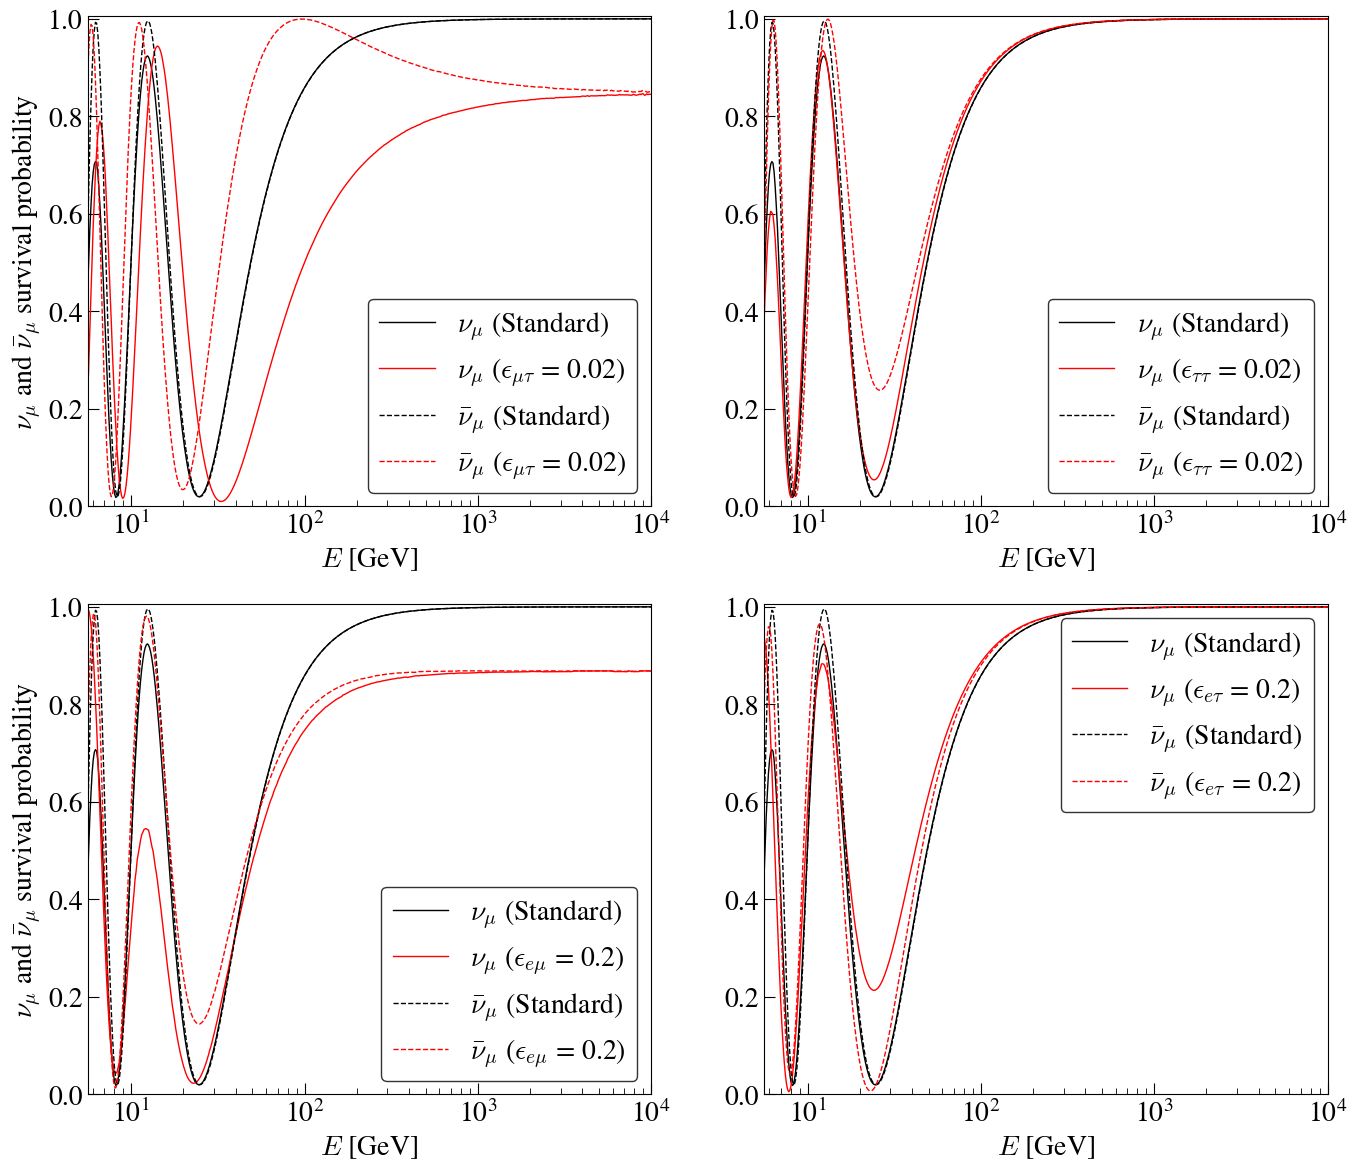

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
ax = ax.flatten()
labels = [
    (r"$\nu_\mu$ (Standard", r"$\nu_\mu$ $\epsilon_{\mu\tau}$ = 0.02"), ("Standard", r"$\epsilon_{\tau\tau}$ = 0.02"),
    ("Standard", r"$\epsilon_{e\mu}$ = 0.2"), ("Standard", r"$\epsilon_{e\tau}$ = 0.2"),
    ]

ax[0].plot(all_range, Pmm_emt_IC[1, :], ls="solid", label=r"$\nu_\mu$ (Standard)", c="black", lw=1)
ax[0].plot(all_range, Pmm_emt_IC[0, :], ls="solid", label=r"$\nu_\mu$ ($\epsilon_{\mu\tau}$ = 0.02)", c="red", lw=1)
ax[0].plot(all_range, Pamam_emt_IC[1, :], ls="dashed", label=r"$\bar{\nu}_\mu$ (Standard)", c="black", lw=1)
ax[0].plot(all_range, Pamam_emt_IC[0, :], ls="dashed", label=r"$\bar{\nu}_\mu$ ($\epsilon_{\mu\tau}$ = 0.02)", c="red", lw=1)

ax[1].plot(all_range, Pmm_ett_IC[1, :], ls="solid", label=r"$\nu_\mu$ (Standard)", c="black", lw=1)
ax[1].plot(all_range, Pmm_ett_IC[0, :], ls="solid", label=r"$\nu_\mu$ ($\epsilon_{\tau\tau}$ = 0.02)", c="red", lw=1)
ax[1].plot(all_range, Pamam_ett_IC[1, :], ls="dashed", label=r"$\bar{\nu}_\mu$ (Standard)", c="black", lw=1)
ax[1].plot(all_range, Pamam_ett_IC[0, :], ls="dashed", label=r"$\bar{\nu}_\mu$ ($\epsilon_{\tau\tau}$ = 0.02)", c="red", lw=1)

ax[2].plot(all_range, Pmm_eem_IC[1, :], ls="solid", label=r"$\nu_\mu$ (Standard)", c="black", lw=1)
ax[2].plot(all_range, Pmm_eem_IC[0, :], ls="solid", label=r"$\nu_\mu$ ($\epsilon_{e\mu}$ = 0.2)", c="red", lw=1)
ax[2].plot(all_range, Pamam_eem_IC[1, :], ls="dashed", label=r"$\bar{\nu}_\mu$ (Standard)", c="black", lw=1)
ax[2].plot(all_range, Pamam_eem_IC[0, :], ls="dashed", label=r"$\bar{\nu}_\mu$ ($\epsilon_{e\mu}$ = 0.2)", c="red", lw=1)

ax[3].plot(all_range, Pmm_eet_IC[1, :], ls="solid", label=r"$\nu_\mu$ (Standard)", c="black", lw=1)
ax[3].plot(all_range, Pmm_eet_IC[0, :], ls="solid", label=r"$\nu_\mu$ ($\epsilon_{e\tau}$ = 0.2)", c="red", lw=1)
ax[3].plot(all_range, Pamam_eet_IC[1, :], ls="dashed", label=r"$\bar{\nu}_\mu$ (Standard)", c="black", lw=1)
ax[3].plot(all_range, Pamam_eet_IC[0, :], ls="dashed", label=r"$\bar{\nu}_\mu$ ($\epsilon_{e\tau}$ = 0.2)", c="red", lw=1)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[2].set_xscale("log")
ax[3].set_xscale("log")


ax[0].set_ylim((0, 1.005))
ax[1].set_ylim((0, 1.005))
ax[2].set_ylim((0, 1.005))
ax[3].set_ylim((0, 1.005))

ax[0].set_xlim((5.6, 10000))
ax[1].set_xlim((5.6, 10000))
ax[2].set_xlim((5.6, 10000))
ax[3].set_xlim((5.6, 10000))

ax[0].legend(fontsize=20).get_frame().set_edgecolor("k")
ax[1].legend(fontsize=20).get_frame().set_edgecolor("k")
ax[2].legend(fontsize=20).get_frame().set_edgecolor("k")
ax[3].legend(fontsize=20).get_frame().set_edgecolor("k")

ax[0].set_ylabel(r"$\nu_\mu$ and $\bar{\nu}_\mu$ survival probability", fontsize=20)
#ax[1].set_ylabel(r"$\nu_\mu$ and $\bar{\nu}_\mu$ survival probability", fontsize=20)
ax[2].set_ylabel(r"$\nu_\mu$ and $\bar{\nu}_\mu$ survival probability", fontsize=20)
#ax[3].set_ylabel(r"$\nu_\mu$ and $\bar{\nu}_\mu$ survival probability", fontsize=20)

ax[0].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[1].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[2].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[3].set_xlabel(r"$E$ [GeV]", fontsize=20)

ax[0].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[0].tick_params(which="minor", length=4)

ax[1].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[1].tick_params(which="minor", length=4)
ax[2].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[2].tick_params(which="minor", length=4)
ax[3].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[3].tick_params(which="minor", length=4)
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args: None
#savethesis(fig, "Pmm_emt_probs")

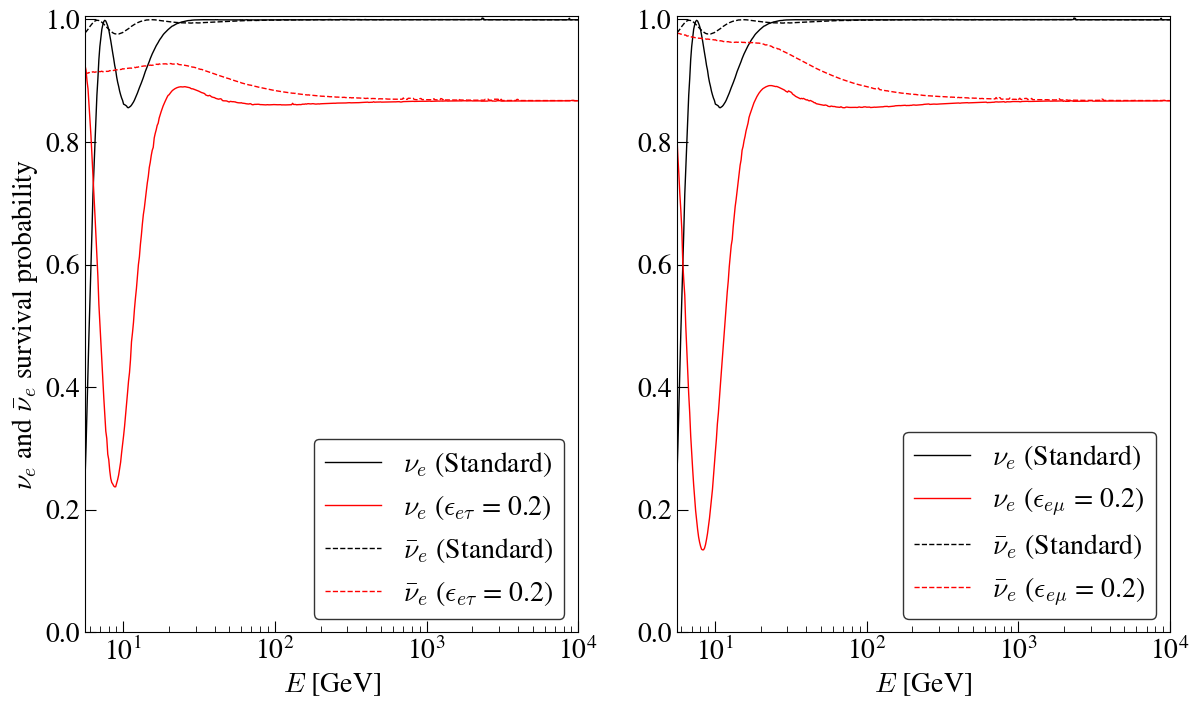

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax = ax.flatten()
labels = ["Standard", r"$\epsilon_{e\tau}$ = 0.2"]

ax[0].plot(all_range, Pee_eet_IC[1, :], ls="solid", label=r"$\nu_e$ (Standard)", c="black", lw=1)
ax[0].plot(all_range, Pee_eet_IC[0, :], ls="solid", label=r"$\nu_e$ ($\epsilon_{e\tau}$ = 0.2)", c="red", lw=1)
ax[0].plot(all_range, Paeae_eet_IC[1, :], ls="dashed", label=r"$\bar{\nu}_e$ (Standard)", c="black", lw=1)
ax[0].plot(all_range, Paeae_eet_IC[0, :], ls="dashed", label=r"$\bar{\nu}_e$ ($\epsilon_{e\tau}$ = 0.2)", c="red", lw=1)

ax[1].plot(all_range, Pee_eem_IC[1, :], ls="solid", label=r"$\nu_e$ (Standard)", c="black", lw=1)
ax[1].plot(all_range, Pee_eem_IC[0, :], ls="solid", label=r"$\nu_e$ ($\epsilon_{e\mu}$ = 0.2)", c="red", lw=1)
ax[1].plot(all_range, Paeae_eem_IC[1, :], ls="dashed", label=r"$\bar{\nu}_e$ (Standard)", c="black", lw=1)
ax[1].plot(all_range, Paeae_eem_IC[0, :], ls="dashed", label=r"$\bar{\nu}_e$ ($\epsilon_{e\mu}$ = 0.2)", c="red", lw=1)

ax[0].set_xscale("log")
ax[1].set_xscale("log")


ax[0].set_ylim((0, 1.005))
ax[1].set_ylim((0, 1.005))
ax[0].set_xlim((5.6, 10000))
ax[1].set_xlim((5.6, 10000))

leg = ax[0].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")
leg = ax[1].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")

ax[0].set_ylabel(r"$\nu_e$ and $\bar{\nu}_e$ survival probability", fontsize=20)
ax[0].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[1].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[0].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[0].tick_params(which="minor", length=4)
ax[1].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[1].tick_params(which="minor", length=4)
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args: None
#savethesis(fig, "Pee_eet_probs")

In [35]:
eem_range = np.linspace(-0.3, 0.3, 29)
eet_range = np.linspace(-0.3, 0.3, 29)
E_range = [5, 25, 200]
param_list = []
for eet in eet_range:
    for eem in eem_range:
        dicta = dc_params_nsi.copy()
        dicta.update({"e_em": eem, "e_et": eet})
        param_list.append(dicta)
    
Pme = []
Pamae = []
Pme_SI = P_num_over_E("m", E_range, nsi=False, params=dc_params_nsi)[0, :]
Pamae_SI = P_num_over_E("m", E_range, nsi=False, anti=True,params=dc_params_nsi)[0, :]
for p in param_list:
    prob = P_num_over_E("m", E_range, nsi=True, params=p)[0, :] - Pme_SI
    Pme.append(prob)
    prob = P_num_over_E("e", E_range, nsi=True, anti=True, params=p)[0, :] - Pamae_SI
    Pamae.append(prob)
Pme = np.array(Pme).reshape(len(eem_range), len(eet_range), len(E_range))
Pamae = np.array(Pamae).reshape(len(eem_range), len(eet_range), len(E_range))


/var/folders/d8/26ffw99535v17_gjshq6kznc0000gp/T/ipykernel_64745/2892955682.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


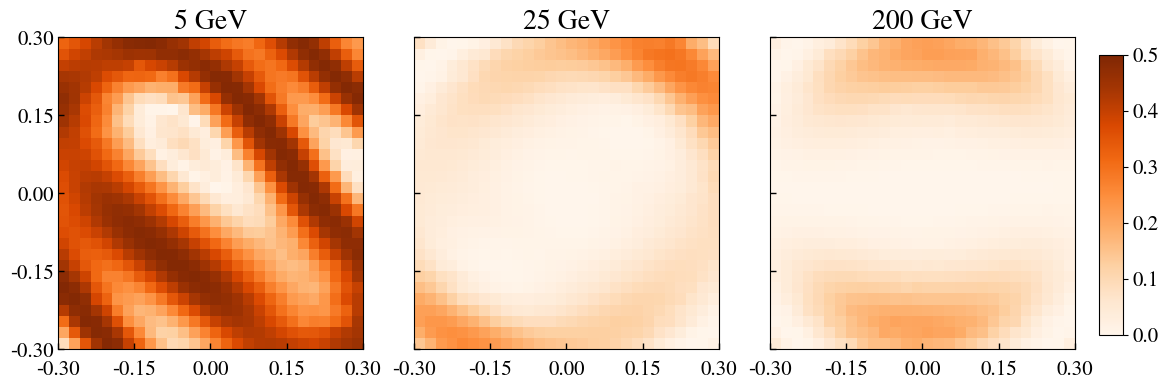

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
titles = ["5 GeV", "25 GeV", "200 GeV"]
for i in range(len(E_range)):
    im = ax[i].pcolormesh(np.abs(Pme[:, :, i].T), cmap="Oranges", vmax=0.5, vmin=0)
    ax[i].tick_params(
        axis="both",
        direction="in",
        which="both",
        labelsize=15,
        width=1,
        length=4,
        zorder=20,
    )
    ax[i].set_title(titles[i], fontsize=20)

    # Set the axis limits in terms of array indices
    ax[i].set_xlim(0, len(eem_range)-1)
    ax[i].set_ylim(0, len(eet_range)-1)

    # Create tick positions and labels
    xtick_positions = np.linspace(0, len(eem_range)-1, 5)
    ytick_positions = np.linspace(0, len(eet_range)-1, 5)
    xtick_labels = np.linspace(-0.3, 0.3, 5)
    ytick_labels = np.linspace(-0.3, 0.3, 5)

    ax[i].set_xticks(xtick_positions)
    ax[i].set_yticks(ytick_positions)
    ax[i].set_xticklabels([f'{x:.2f}' for x in xtick_labels])
    ax[i].set_yticklabels([f'{y:.2f}' for y in ytick_labels])
    # Adjust label positions to prevent overlap
    ax[i].tick_params(axis='x', pad=8)  # Add padding between x-axis and its labels
    ax[i].tick_params(axis='y', pad=3)  # Add padding between x-axis and its labels




    ax[i].xaxis.get_major_formatter()._usetex = True
    ax[i].yaxis.get_major_formatter()._usetex = True
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, norm=CenteredNorm(0))
cbar.ax.tick_params(labelsize=15)

# plt.suptitle('$P_{NSI} - P_{SI}$', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(right=0.9)

#savethesis(fig, "eem_eet_prob.pdf")

/var/folders/d8/26ffw99535v17_gjshq6kznc0000gp/T/ipykernel_64745/4058413032.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


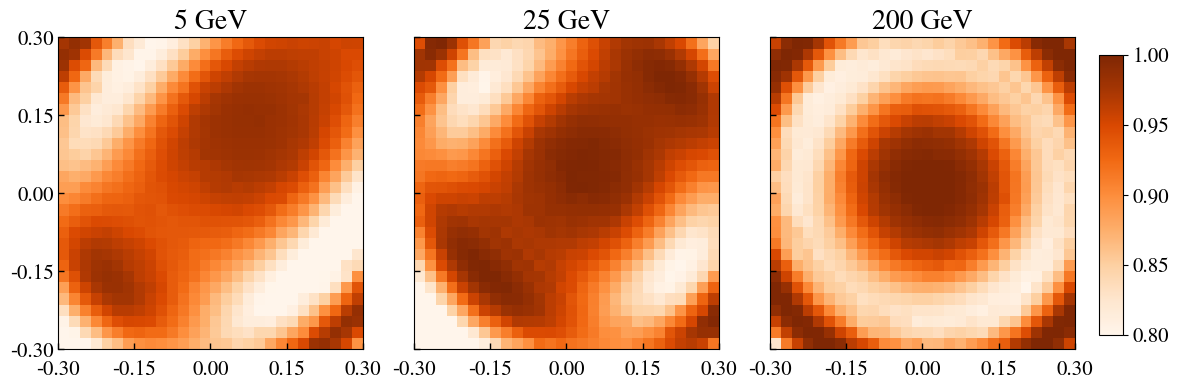

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
titles = ["5 GeV", "25 GeV", "200 GeV"]
for i in range(len(E_range)):
    im = ax[i].pcolormesh(np.abs(Pamae[:, :, i].T), cmap="Oranges", vmax=1, vmin=0.8)
    ax[i].tick_params(
        axis="both",
        direction="in",
        which="both",
        labelsize=15,
        width=1,
        length=4,
        zorder=20,
    )
    ax[i].set_title(titles[i], fontsize=20)

    # Set the axis limits in terms of array indices
    ax[i].set_xlim(0, len(eem_range)-1)
    ax[i].set_ylim(0, len(eet_range)-1)

    # Create tick positions and labels
    xtick_positions = np.linspace(0, len(eem_range)-1, 5)
    ytick_positions = np.linspace(0, len(eet_range)-1, 5)
    xtick_labels = np.linspace(-0.3, 0.3, 5)
    ytick_labels = np.linspace(-0.3, 0.3, 5)

    ax[i].set_xticks(xtick_positions)
    ax[i].set_yticks(ytick_positions)
    ax[i].set_xticklabels([f'{x:.2f}' for x in xtick_labels])
    ax[i].set_yticklabels([f'{y:.2f}' for y in ytick_labels])
    # Adjust label positions to prevent overlap
    ax[i].tick_params(axis='x', pad=8)  # Add padding between x-axis and its labels
    ax[i].tick_params(axis='y', pad=3)  # Add padding between x-axis and its labels




    ax[i].xaxis.get_major_formatter()._usetex = True
    ax[i].yaxis.get_major_formatter()._usetex = True
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, norm=CenteredNorm(0))
cbar.ax.tick_params(labelsize=15)

# plt.suptitle('$P_{NSI} - P_{SI}$', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(right=0.9)

#savethesis(fig, "eem_eet_prob.pdf")